In [ ]:

import sys
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report


from spnc import spnc_anisotropy
import spnc_ml as ml







In [3]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

In [3]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

In [4]:
# Params
params = {
    'theta':1/3, 
    'gamma':0.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.0001,
    'train_sample': Ntrain,
    'test_sample': Ntest
}

In [6]:
spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime, Primep1=False,p1=None,initialize = False,restart = False,)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
model p1: 0.4999998889492148
skip initializing..
skip restarting..
noise-free output
Seed Training: 1234
model p1: 0.49597909343201535
skip initializing..
skip restarting..
noise-free output
Spacer NRMSE:0
0.005254952787348485 0.6550362946496222


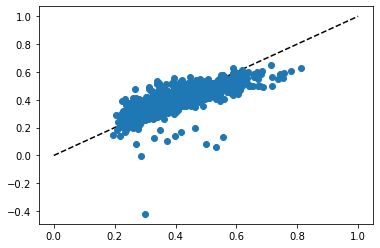

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
model p1: 0.4969339088834572
skip initialization
skip restarting..
noise-free output
Seed Training: 1234
model p1: [0.49599307]
skip initialization
skip restarting..
noise-free output
Spacer NRMSE:0
0.004762531581372221 0.623591072893647


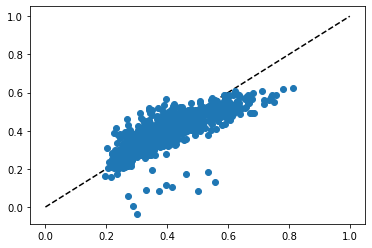

In [7]:
# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Transform from new reservoir in between runs (no restart)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
skip initializing..
skip restarting..
noise-free output
Seed Training: 1234
skip initializing..
skip restarting..
noise-free output
Spacer NRMSE:0
0.005254952787348485 0.6550362946496222


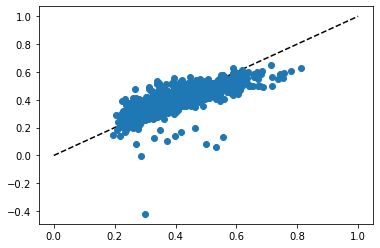

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
skip initialization
skip restarting..
noise-free output
Seed Training: 1234
skip initialization
skip restarting..
noise-free output
Spacer NRMSE:0
1.0971542224398991 9.464873076806915


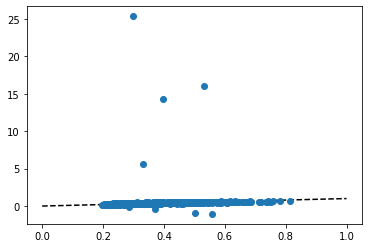

0.4888930615760112

In [7]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':0.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.0001,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = False)
transforms = spn.gen_signal_slow_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = False)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])


Look at some of the data

0.5601789835931897
0.4888930615760112


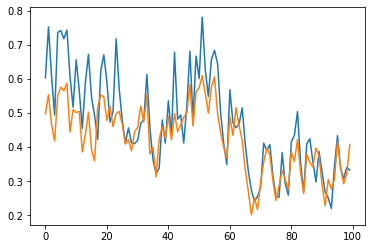

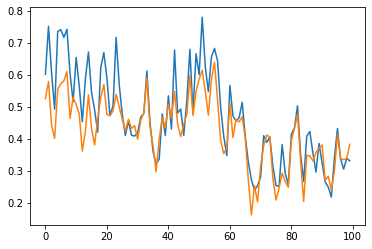

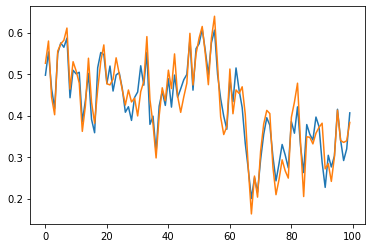

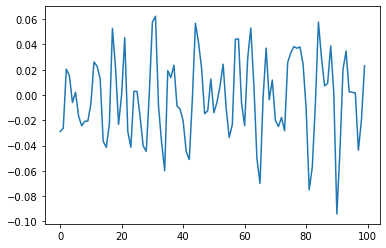

In [8]:
spac = 50
window = 100

plt.figure()
plt.plot(y_test_s[spac:spac+window])
plt.plot(y_pred_s[spac:spac+window])

plt.figure()
plt.plot(y_test_f[spac:spac+window])
plt.plot(y_pred_f[spac:spac+window])

plt.figure()
plt.plot(y_pred_s[spac:spac+window])
plt.plot(y_pred_f[spac:spac+window])

plt.figure()
plt.plot(y_pred_s[spac:spac+window]-y_pred_f[spac:spac+window])

print(NRMSE_list(y_test_s[spac:],y_pred_s[spac:]))
print(NRMSE_list(y_test_f[spac:],y_pred_f[spac:]))

Repeat above, but with restart on...

Initalise before

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
skip initializing..
restarted
noise-free output
Seed Training: 1234
skip initializing..
restarted
noise-free output
Spacer NRMSE:0
0.005249858147796289 0.654718691125495


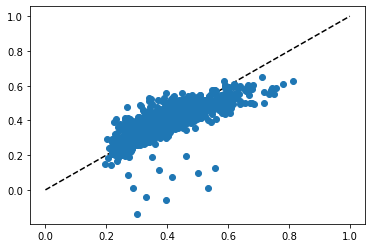

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
skip initialization
restarted
noise-free output
Seed Training: 1234
skip initialization
restarted
noise-free output
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


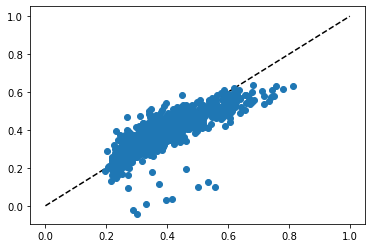

In [9]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':0.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.0001,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)


Initalise between

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
skip initializing..
restarted
noise-free output
Seed Training: 1234
skip initializing..
restarted
noise-free output
Spacer NRMSE:0
0.005249858147796289 0.654718691125495


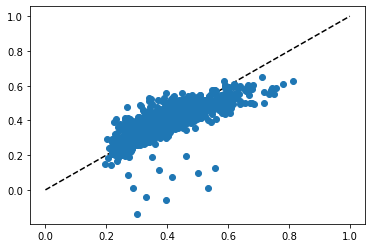

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
skip initialization
restarted
noise-free output
Seed Training: 1234
skip initialization
restarted
noise-free output
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


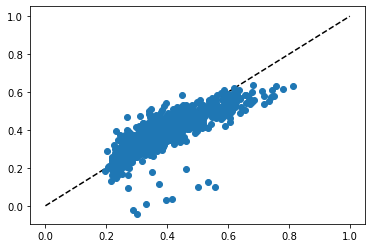

0.48889321880955383

In [10]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':0.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.0001,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = True)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])

#### More virtual nodes

initialise before, use restart

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initializing..
restarted
noise-free output
Seed Training: 1234
skip initializing..
restarted
noise-free output
Spacer NRMSE:0
0.005131619177837778 0.6473038123124765


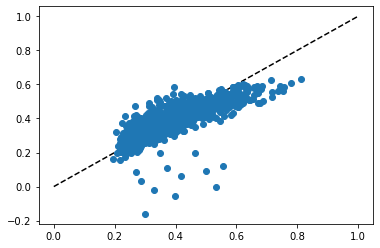

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initialization
restarted
noise-free output
Seed Training: 1234
skip initialization
restarted
noise-free output
Spacer NRMSE:0
0.0030677718785768536 0.5004866367624409


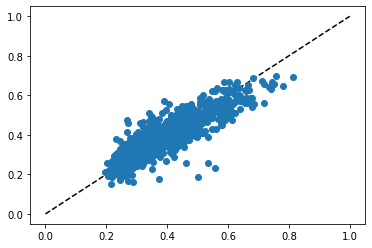

In [11]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':0.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.0001,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

### redo the task by utilizing the parameters in meeting 

no primep1, inherent p1, no initialize, no noisy, slow and fast.
Nv = 400, m0 = 0.003, gamma = .113, beta_prime = 20, theta = 0.3
slow = 0.6341; fast = 0.6056

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initializing..
restarted
noise-free output
Seed Training: 1234
skip initializing..
restarted
noise-free output
Spacer NRMSE:0
0.00521166565453676 0.6523328187011886


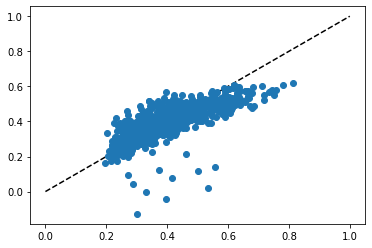

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initialization
restarted
noise-free output
Seed Training: 1234
skip initialization
restarted
noise-free output
Spacer NRMSE:0
0.003625773730486526 0.54410323006978


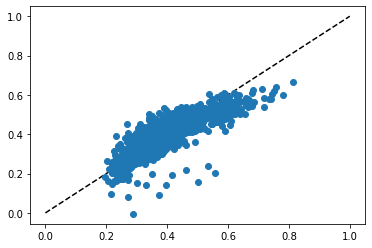

In [13]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.0001,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise


seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initializing..
restarted
noisy output
Seed Training: 1234
skip initializing..
restarted
noisy output
Spacer NRMSE:0
0.005472807202320881 0.6684763231519619


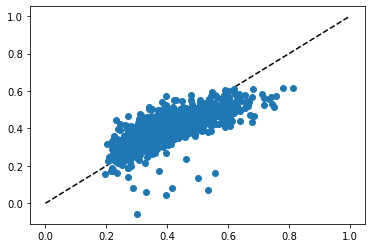

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initialization
restarted
noisy output
Seed Training: 1234
skip initialization
restarted
noisy output
Spacer NRMSE:0
0.005304424458925664 0.6581124239096672


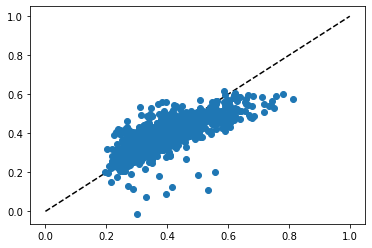

In [19]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_std':0.00013,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add larger noise

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initializing..
restarted
noisy output
Seed Training: 1234
skip initializing..
restarted
noisy output
Spacer NRMSE:0
0.006138856434118467 0.7079860385578539


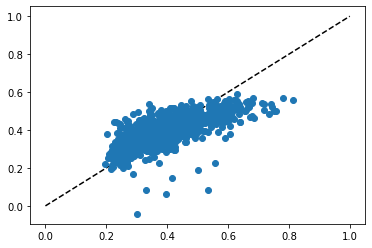

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initialization
restarted
noisy output
Seed Training: 1234
skip initialization
restarted
noisy output
Spacer NRMSE:0
0.0063747214049434415 0.7214588410691212


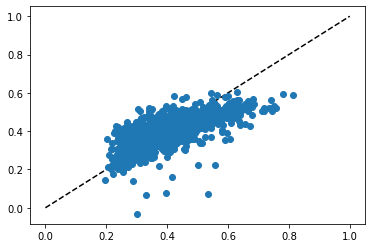

In [15]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_std':0.0003,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=False,p1=None,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add Primep1, p1=0.50174584

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initializing..
restarted
noise-free output
Seed Training: 1234
skip initializing..
restarted
noise-free output
Spacer NRMSE:0
0.00521166565453676 0.6523328187011886


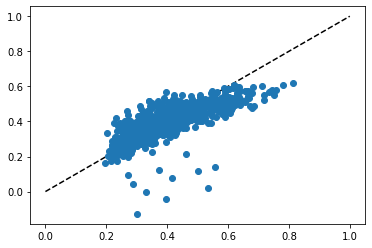

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initialization
restarted
noise-free output
Seed Training: 1234
skip initialization
restarted
noise-free output
Spacer NRMSE:0
0.003625773730486526 0.54410323006978


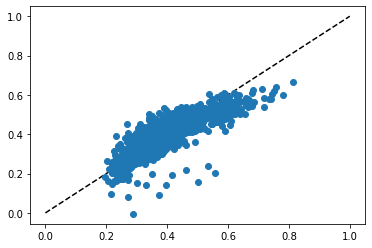

In [16]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.0003,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=True,p1=0.50174584,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

another value of Primep1

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initializing..
restarted
noise-free output
Seed Training: 1234
skip initializing..
restarted
noise-free output
Spacer NRMSE:0
0.00521166565453676 0.6523328187011886


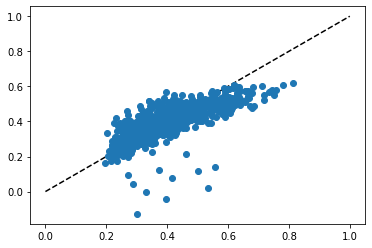

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initialization
restarted
noise-free output
Seed Training: 1234
skip initialization
restarted
noise-free output
Spacer NRMSE:0
0.003625773730486526 0.54410323006978


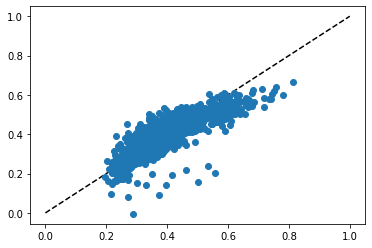

In [17]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.0003,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=True,p1=0.51,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise and Primep1 at the same time

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initializing..
restarted
noisy output
Seed Training: 1234
skip initializing..
restarted
noisy output
Spacer NRMSE:0
0.005502858715398735 0.6703091324015709


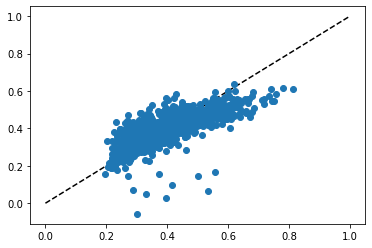

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
skip initialization
restarted
noisy output
Seed Training: 1234
skip initialization
restarted
noisy output
Spacer NRMSE:0
0.005378054408952306 0.662664264254701


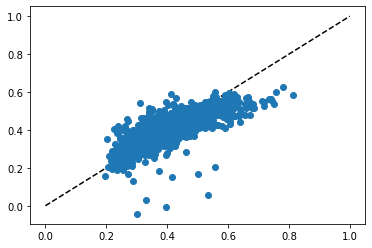

In [18]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_std':0.00013,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,Primep1=True,p1=0.50174584,initialize = False,restart = True)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

validate why primep1 doesn't work. add print(primep1: self.p1)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x0000023F04F09688>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x0000023F04F096D8>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023F04F39F48>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023F04F600E8>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x0000023F04F60278>
f_e_21_big: <scipy.interpolate.interpolate.interp1d object at 0x

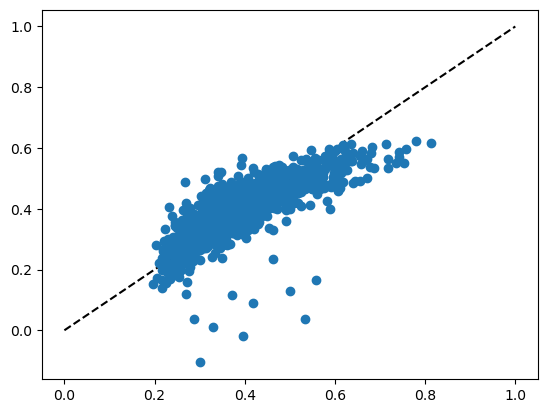

In [4]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_std':0.00013,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None,p1=0.50174584,initialize = False)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)